In [14]:
# Step 1: Import Libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.feature_extraction.text import CountVectorizer  # For converting text data to numerical features
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier for machine learning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluating the model performance
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import seaborn as sns

In [2]:
# Step 2: Load and Explore the Data
data = pd.read_csv("spam.csv", encoding="latin-1")

# Display the first few rows of the DataFrame
print(data.head())

# Check the distribution of spam and ham labels
print(data['v1'].value_counts())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
v1
ham     4825
spam     747
Name: count, dtype: int64


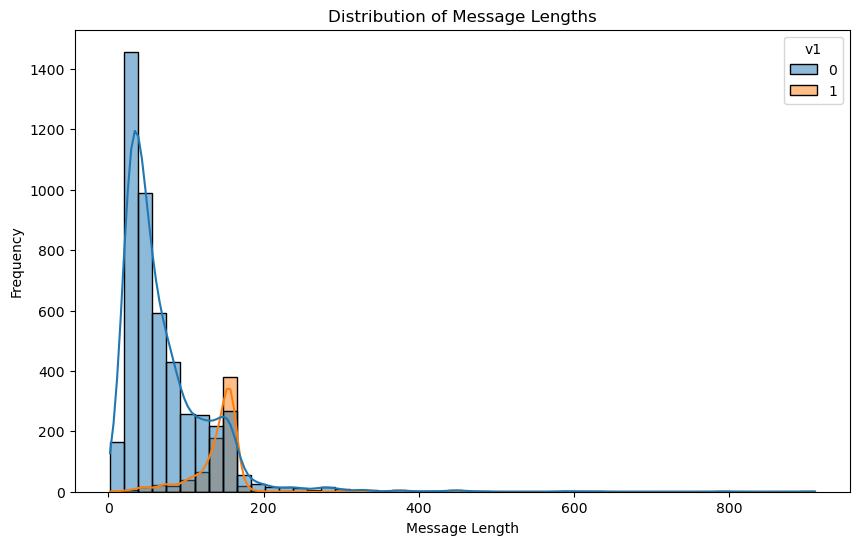

In [16]:
# Create a new column for message lengths
data['Message Length'] = data['v2'].apply(len)

# Plot the distribution of message lengths for spam and ham
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Message Length', hue='v1', bins=50, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

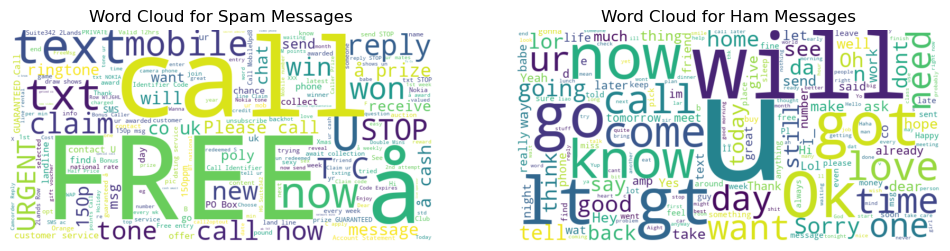

In [17]:
from wordcloud import WordCloud

# Generate word clouds for spam and ham messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data[data['v1'] == 1]['v2']))
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data[data['v1'] == 0]['v2']))

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

plt.show()

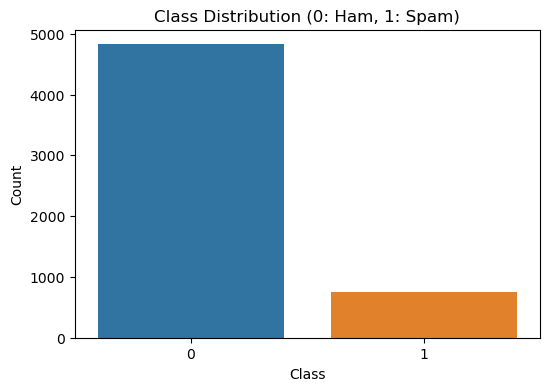

In [18]:
# Plot the distribution of spam and ham classes
plt.figure(figsize=(6, 4))
sns.countplot(x='v1', data=data)
plt.title('Class Distribution (0: Ham, 1: Spam)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [3]:
# Step 3: Data Preprocessing
# Remove any unnecessary columns
data = data[['v1', 'v2']]

# Convert labels to binary (0 for ham, 1 for spam)
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)

In [4]:
# Step 4: Feature Extraction
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [5]:
# Step 5: Train the Model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [6]:
# Step 6: Make Predictions
predictions = model.predict(X_test_vectorized)

In [7]:
# Step 7: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[963   2]
 [ 16 134]]


In [8]:
# Step 8: Test with New Messages
new_messages = ["Congratulations, you've won a prize!", "Can we meet tomorrow?"]
new_messages_vectorized = vectorizer.transform(new_messages)
new_predictions = model.predict(new_messages_vectorized)

print("\nNew Message Predictions:", new_predictions)


New Message Predictions: [1 0]


In [10]:
# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test_vectorized)[:, 1]

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

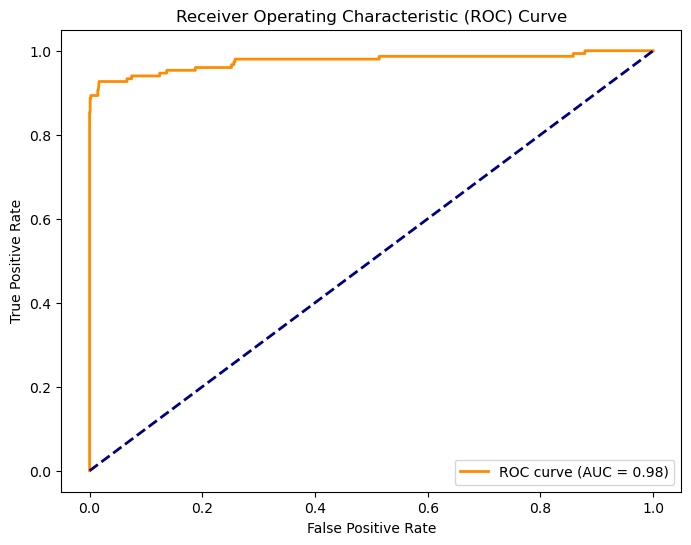

In [11]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

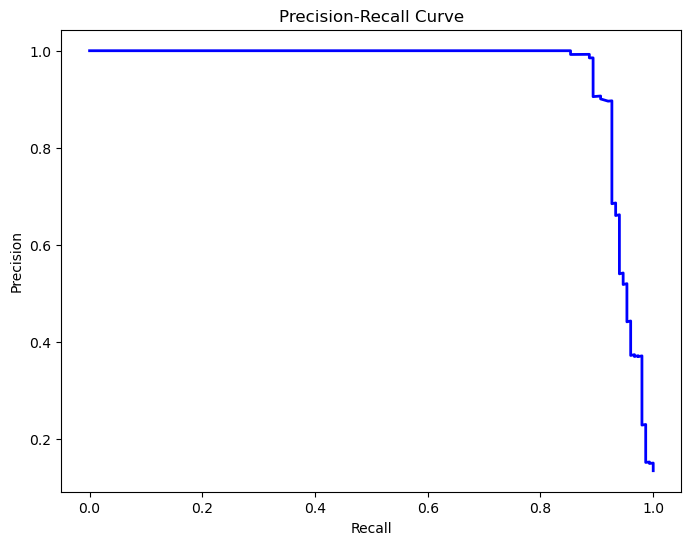

In [13]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

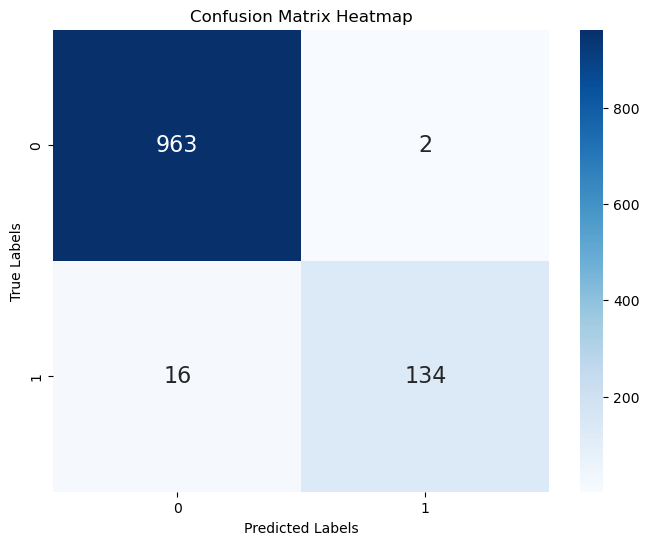

In [15]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()